# Boston Housing Data (EDA)

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.2 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Maplotlib version:     2.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- TAN WEI

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

In [4]:
boston = pd.DataFrame(bdata.data)
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston.columns = bdata.feature_names[:]
boston['MEDV'] = pd.DataFrame(bdata.target)
print(boston.shape)
boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [6]:
numberofVariables = len(boston.columns)
print('Number of Variables = ', numberofVariables)
numberofObs = len(boston)
print('Number of Observations = ', numberofObs)

x = len(boston[boston['CHAS'] == 1])
print('Number of instances where tract bounds the Charles River = ', x)

missing_values =boston.isnull().values.any()
print('Are there any missing values? ', missing_values)

most_ex = boston[boston['MEDV'] == boston['MEDV'].max()]
print('Property tax rate of 5 neighborhoods with highest medium housing price = ', most_ex.iloc[0:5]['TAX'])

Number of Variables =  14
Number of Observations =  506
Number of instances where tract bounds the Charles River =  35
Are there any missing values?  False
Property tax rate of 5 neighborhoods with highest medium housing price =  161    403.0
162    403.0
163    403.0
166    403.0
186    193.0
Name: TAX, dtype: float64


*Provide our answers below:*

 - 1.1.1: Number of Variables = 14. Number of Observations = 506.
 - 1.1.2: Number of instances where tract bounds the Charles River = 35.
 - 1.1.3: There are no missing values in the dataset.
 - 1.1.4: There are 16 neighborhoods with the highest median housing price of $50,000. The top five neighborhoods (according to index) were chosen from the sorted dataframe, giving property tax rates of 403.0, 403.0, 403.0, 403.0 and 193.0. 

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [7]:
print('The median housing price in Boston\'s most expensive neighborhood is = $', most_ex.iloc[0]['MEDV'] * 1000)

print('The number of neighborhoods with less than 5 rooms per dwelling = ', len(boston[boston['RM'] < 5]))

most_ex_adj = most_ex[most_ex['CHAS'] == 1]
most_ex_adj.sort_index(ascending = True)
print('The property tax rate in the most expensive neighborhood that is also adjacent to the Charles River = ', most_ex_adj.iloc[0]['TAX'])

print('The crime rate in the neighborhood with the highest median housing price is = ', most_ex.iloc[0]['CRIM'])

lowest_medv = boston[boston['MEDV'] == boston['MEDV'].min()]
print('The crime rate in the neighborhood with the lowest median housing price is = ', lowest_medv.iloc[0]['CRIM'])


The median housing price in Boston's most expensive neighborhood is = $ 50000.0
The number of neighborhoods with less than 5 rooms per dwelling =  15
The property tax rate in the most expensive neighborhood that is also adjacent to the Charles River =  403.0
The crime rate in the neighborhood with the highest median housing price is =  1.46336
The crime rate in the neighborhood with the lowest median housing price is =  38.3518


*Provide our answers below:*

 - 1.2.1: The median housing price in Boston's most expensive neighborhood is \$50,000.
 - 1.2.2: There are 15 neighborhoods which have less than 5 rooms per dwelling on average.
 - 1.2.3: There are 6 neighborhoods, all with the highest median value of \$50,000, which are adjacent to the Charles River. We pick the neighborhood at the top of the list sorted by index, giving us a property tax rate of 403.0
 - 1.2.4: There are 16 neighborhoods with the highest median housing price of \$50,000. We pick the neighborhood at the top of the list sorted by index, giving us a crime rate of 1.46336.
 - 1.2.5: There are 2 neighborhoods with the lowest median housing price of \$5,000. We pick the neighbourhood at the top of the list sorted by index, giving us a crime rate of 38.3518.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [8]:
header = [ 'Non-Missing Values', 'Mean', 'Std', 'Min', 'Median', 'Max']
stats = pd.DataFrame(index = boston.columns, columns = header)
stats.index.name = 'Variable Name'
stats['Non-Missing Values'] = boston.count()
stats['Mean'] = boston.mean()
stats['Std'] = boston.std()
stats['Min'] = boston.min()
stats['Median'] = boston.median()
stats['Max'] = boston.max()
stats

,Non-Missing Values,Mean,Std,Min,Median,Max
Variable Name,,,,,,
CRIM,506,3.593761,8.596783,0.00632,0.25651,88.9762
ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [9]:
adj_river = boston[boston['CHAS'] == 1]['MEDV']
non_adj = boston[boston['CHAS']==0]['MEDV']
t, p = sp.stats.ttest_ind(adj_river, non_adj, equal_var = False)
print('t_test_ind: t-statistic = %g, p-value = %g' %(t,p))

t_test_ind: t-statistic = 3.11329, p-value = 0.00356717


The p-value obtained from the t-test is 0.00356717. This represents the probability of incorrectly rejecting the null hypothesis that prices are equivalent. Assuming a significance level of 0.05, we can reject the null hypothesis and conclude that the prices are not equivalent.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


In [10]:
boston['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


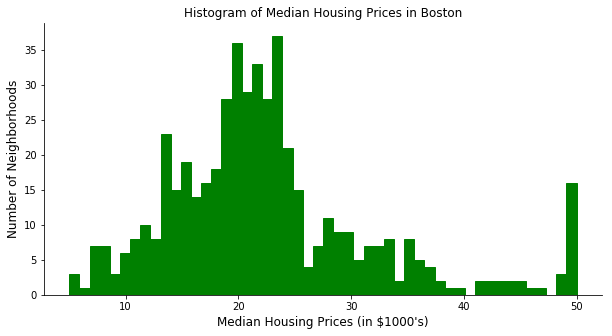

In [12]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  
import seaborn as sns

# edit the code below to make the graph look good
plt.figure(figsize = (10,5))
ax = plt.hist(boston['MEDV'], Color = 'green', bins = 50)
plt.xlabel('Median Housing Prices (in $1000\'s)', fontsize = 12)
plt.ylabel('Number of Neighborhoods', fontsize = 12)
plt.title('Histogram of Median Housing Prices in Boston', fontsize = 12)
sns.despine()
print(boston['MEDV'])

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


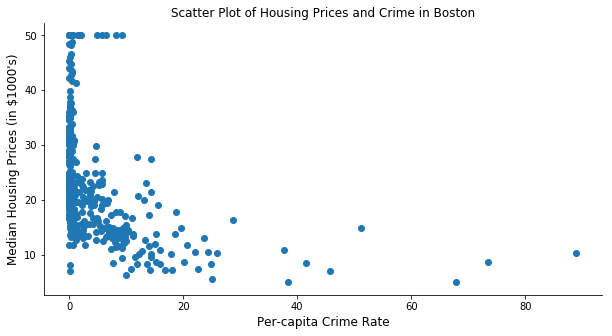

In [14]:
plt.figure(figsize = (10,5))
ax = plt.scatter(boston['CRIM'], boston['MEDV'])
plt.ylabel('Median Housing Prices (in $1000\'s)', fontsize = 12)
plt.xlabel('Per-capita Crime Rate', fontsize = 12)
plt.title('Scatter Plot of Housing Prices and Crime in Boston', fontsize = 12)
sns.despine()

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

In [15]:
corr = sp.stats.pearsonr(boston['MEDV'], boston['CRIM'])
print('The correlation between crime rates and housing prices in Boston is', round(corr[0],3), 'with a p-value of', corr[1])

The correlation between crime rates and housing prices in Boston is -0.386 with a p-value of 2.0835501108141935e-19


There appears to be a relationship between crime rates and housing prices in Boston. It seems that per-capita crime rates are higher in neighborhoods where housing prices are lower. Indeed, the two variables has a small negative correlation of -0.386 with p-value close to 0, suggesting that there is an inverse relationship bettween the two variables.

I believe this relationship is merely a correlation. Let's consider neighborhoods with higher housing prices. In this case, the root cause can be identified as neighborhoods with wealthy families, which causes (enables) them to own expensive houses. It is the same root cause (being wealthy) which causes, for example, the need to commit theft-related crimes to be reduced. Hence, in this setting, the relationship between higher housing prices and lower crime rates can be regarded as merely a correlation.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

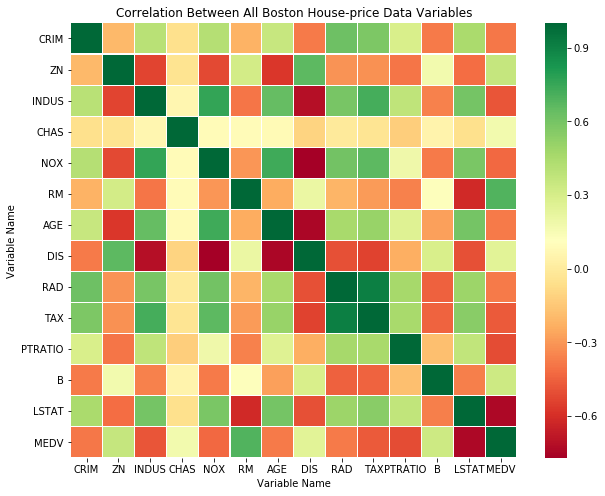

In [16]:
from matplotlib import cm as cm
import seaborn as sns

plt.figure(figsize = (10,8))
ax = plt.axes()
corr_matrix = boston.corr()
sns.heatmap(corr_matrix, ax = ax, cmap = "RdYlGn", linewidths = 0.05)
ax.set_title('Correlation Between All Boston House-price Data Variables', fontsize = 12)
plt.show()

The diagonal values in the correlation matrix are all 1's because the correlation of any variable and itself is always 1. 

The most positively correlated variables appear to be TAX (full value property tax) and RAD (accessibility to radial highways). Indeed, the actual correlation matrix gives a correlation of 0.910 for these two variables.

The most negatively correlated variables appear to be NOX (nitric oxides concentration) and DIS (weighted average distance to 5 Boston employment centres). The actual correlation matrix gives a correlation of -0.769 for these two variables. 

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

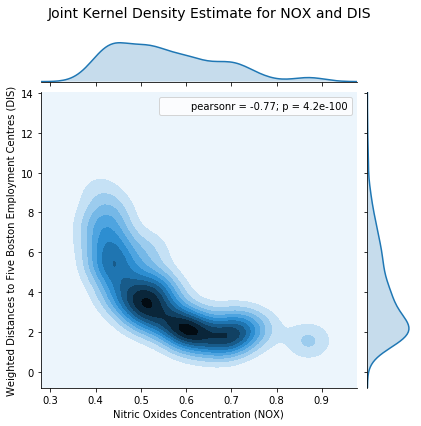

In [17]:
g = sns.jointplot(boston['NOX'], boston['DIS'], kind = 'kde', space = 0.25, ratio = 6)
g.set_axis_labels("Nitric Oxides Concentration (NOX)", "Weighted Distances to Five Boston Employment Centres (DIS)")
g.fig.suptitle('Joint Kernel Density Estimate for NOX and DIS', fontsize = 14)
g.fig.subplots_adjust(top= 0.9)

I have chosen the Joint Kernel Density Estimate visualisation tool to demonstrate the relationship between nitric oxides concentration (NOX), and weighted distances to five Boston employment centres (DIS). This method conspicuously depicts the negative correlation between NOX and DIS, and shows where the data points are concentrated (color intensity). Additionally, the probability density functions (PDF) of both NOX and DIS are produced at the top and right side of the graph respectively. These PDFs provide added insight by showing how the variables vary across different magnitudes. The exact correlation (and p-value) between the two variables have been reproduced at the top right-hand corner of the graph.